In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

## <span style="color:blue">  Esercizio 3.1 -  Pricing di opzioni vanilla </span>

In [28]:
Call=np.loadtxt("dataCall.txt", usecols=0)
stdCall=np.loadtxt("dataCall.txt", usecols=1)

Call_iter=np.loadtxt("dataCall_iter.txt", usecols=0)
stdCall_iter=np.loadtxt("dataCall_iter.txt", usecols=1)

Put=np.loadtxt("dataPut.txt", usecols=0)
stdPut=np.loadtxt("dataPut.txt", usecols=1)

Put_iter=np.loadtxt("dataPut_iter.txt", usecols=0)
stdPut_iter=np.loadtxt("dataPut_iter.txt", usecols=1)

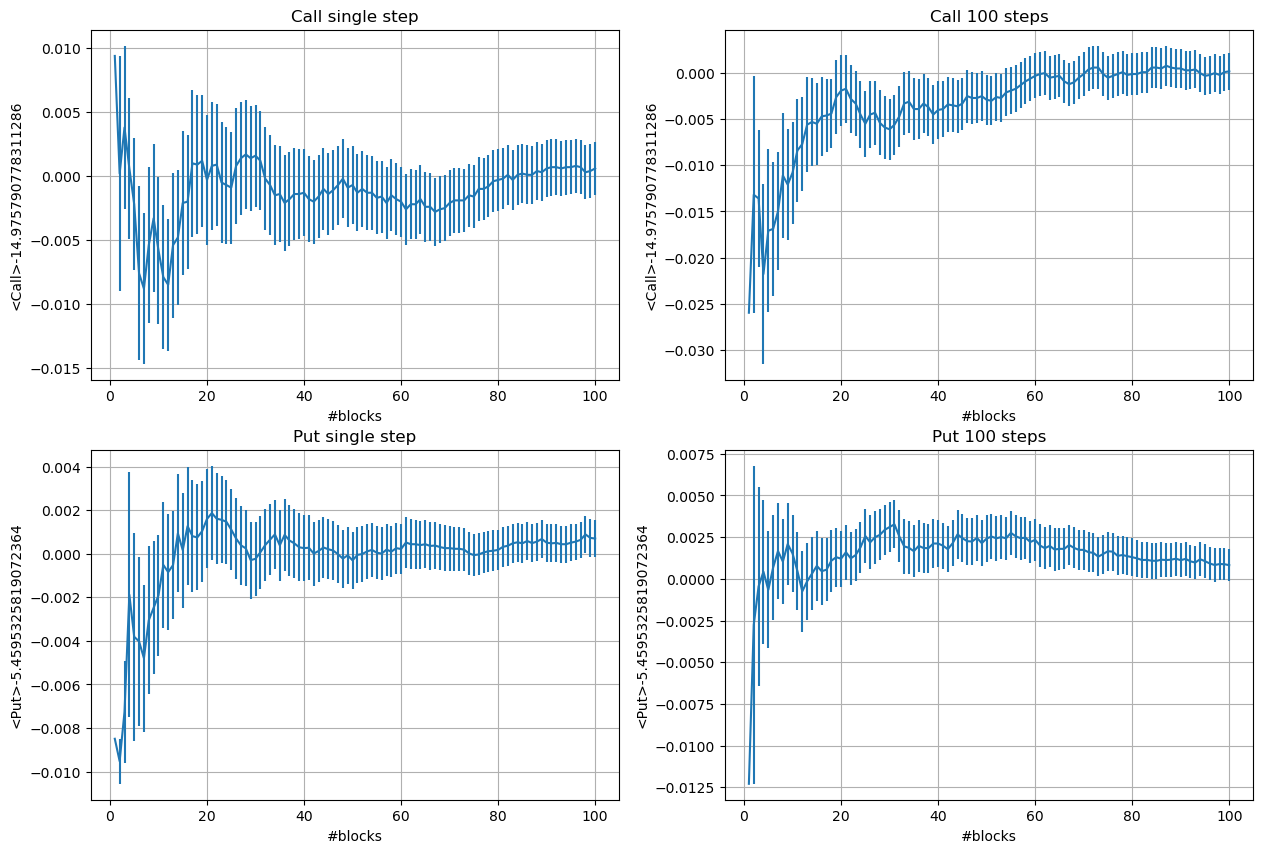

In [30]:
N=100 #100 blocchi
x = np.arange(N)+1 #vettore con cifre da 1 a 1000 

figure, ax = plt.subplots(2,2, figsize=(15, 10))

ax[(0,0)].set_title("Call single step")
ax[(0,0)].errorbar(x,Call-14.975790778311286,yerr=stdCall)
ax[(0,0)].set_xlabel('#blocks')
ax[(0,0)].set_ylabel('<Call>-14.975790778311286')
ax[(0,0)].grid(True)

ax[(0,1)].set_title("Call 100 steps")
ax[(0,1)].errorbar(x,Call_iter-14.975790778311286,yerr=stdCall_iter)
ax[(0,1)].set_xlabel('#blocks')
ax[(0,1)].set_ylabel('<Call>-14.975790778311286')
ax[(0,1)].grid(True)

ax[(1,0)].set_title("Put single step")
ax[(1,0)].errorbar(x,Put-5.4595325819072364,yerr=stdPut)
ax[(1,0)].set_xlabel('#blocks')
ax[(1,0)].set_ylabel('<Put>-5.4595325819072364')
ax[(1,0)].grid(True)

ax[(1,1)].set_title("Put 100 steps")
ax[(1,1)].errorbar(x,Put_iter-5.4595325819072364,yerr=stdPut_iter)
ax[(1,1)].set_xlabel('#blocks')
ax[(1,1)].set_ylabel('<Put>-5.4595325819072364')
ax[(1,1)].grid(True)

plt.show()

## Commenti

### Scopo dell'esercizio e risultati attesi
- Un'opzione è un contratto che conferisce il diritto, ma non l'obbligo di comprare (call) o vendere (put) un'azione ad un prezzo prestabilito $K$ a tempo $T$.
- Il modello che utilizziamo assume che il prezzo dell'azione $S(t)$ segua un moto browniano geometrico, cosicché il prezzo dell'azione è sempre positivo e tiene in considerazione trend positivo e fluttuazioni casuali.
- Esiste una soluzione analitica grazie alla quale si può stimare il prezzo delle opzioni di call e di put.
- Si fa una simulazione Monte Carlo prima campionando in maniera diretta $S(t=T)$, poi utilizzando una formula ricorsiva che permette di simulare l'evoluzione temporale di $S(t)$ (con $t<T$) fino ad un tempo $T$. Questa simulazione deve essere ripetuta più volte per poter fare data blocking.
### Risultati ottenuti
- Sono stati utilizzati $N=100$ blocchi e $M=10^6$ steps per fare data blocking.
- Utilizzando la teoria di Black-Scholes per stimare analiticamente il prezzo delle opzioni di call e di put, si ottiene come risultato rispettivamente 14.975790778311286 e 5.4595325819072364. Questi due valori sono espressi in unità di misura monetarie arbitrarie.
- In tutti e 4 i casi (call e put, calcolati con la formula ricorsiva o con un singolo step) vedo che il risultato della simulazione a cui sottraggo il risultato calcolato analiticamente converge a 0 al crescere del numero dei blocchi.
- Per le ragioni già commentate in esercizi precedenti l'incertezza diminuisce all'aumentare del numero dei blocchi.
- Entrambe le soluzioni non dovrebbero introdurre un errore di discretizzazione nel calcolo, dai valori delle incertezze infatti si capisce che nessuno dei due metodi di calcolo è migliore degli altri, se non per tempo di computazione.